In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
base_dir = os.path.abspath('../data')      
data_file = base_dir + r'/RunDataTable.tsv'
relationship_def_file = base_dir + r'/RelationshipDefTable.tsv'
relationship_data_file = base_dir + r'/RelationshipDataTable.tsv'
summary_statistics_data_file = base_dir + r'/SummaryStatisticsDataTable.tsv'
variable_def_table = base_dir + r'/VariableDefTable.tsv'
base_dir

'/home/workstation/PycharmProjects/urban world/data'

In [3]:
data = pd.read_table(data_file,parse_dates=True)
data['VariableName'].unique()

array(['CurrentVisitor', 'OngoingMeetingId', 'Participant', 'Checkin',
       'Checkout', 'SiteType', 'SiteLocation', 'BuildingId', 'ApproxAge',
       'HomeLocation', 'WorkLocation', 'IncomePerHour'], dtype=object)

In [4]:
temp=data[data['VariableName']=='SiteLocation']
# meeting_data = temp[temp['EntityIdx']=='Site-2629']
# data[data['VariableName']=='OngoingMeetingId']
temp.head(51)

,Timestep,VariableName,EntityIdx,Value,Notes
12934154,2019-10-31 00:00:00,SiteLocation,Site-1,POINT(-1942.39798523 1819.25704205492),"{""Request"":""1. Environment and Census Data""}"
12934155,2019-10-31 00:00:00,SiteLocation,Site-2,POINT(-1509.74449874375 861.602140770138),"{""Request"":""1. Environment and Census Data""}"
12934156,2019-10-31 00:00:00,SiteLocation,Site-3,POINT(-1433.68180835596 1458.62491981251),"{""Request"":""1. Environment and Census Data""}"
12934157,2019-10-31 00:00:00,SiteLocation,Site-4,POINT(643.094629045939 2274.96368553021),"{""Request"":""1. Environment and Census Data""}"
12934158,2019-10-31 00:00:00,SiteLocation,Site-5,POINT(-1516.73141786382 2118.38302398887),"{""Request"":""1. Environment and Census Data""}"
12934159,2019-10-31 00:00:00,SiteLocation,Site-6,POINT(-1732.67408678615 708.259484709413),"{""Request"":""1. Environment and Census Data""}"
12934160,2019-10-31 00:00:00,SiteLocation,Site-7,POINT(57.0410904786683 637.877597192334),"{""Request"":""1. Environment and Census Data""}"
12934161,2019-10-31 00:00:00,SiteLocation,Site-8,POINT(403.401228311222 851.500058157324),"{""Request"":""1. Environment and Census Data""}"
12934162,2019-10-31 00:00:00,SiteLocation,Site-9,POINT(-1230.46350151207 869.45608788015),"{""Request"":""1. Environment and Census Data""}"
12934163,2019-10-31 00:00:00,SiteLocation,Site-10,POINT(-1529.56747076438 1081.3109859039),"{""Request"":""1. Environment and Census Data""}"


In [5]:
summary_statistics_data = pd.read_table(summary_statistics_data_file,parse_dates=True, index_col=0)
summary_statistics_data['VariableName'].unique()

array(['NumOfPeopleInSite', 'Population', 'MedianFamilyIncome',
       'OccupiedUnits', 'VacantUnits', 'AverageTravelTime'], dtype=object)

In [6]:
summary_statistics_data= summary_statistics_data[summary_statistics_data['VariableName']=='Population']
summary_statistics_data[summary_statistics_data['EntityIdx']=='Neighborhood-2']


,VariableName,EntityIdx,Value,Metadata
Timestep,,,,
2019-08-30,Population,Neighborhood-2,1104.0,"{""Sampling"":""All"",""Calculation"":""count"",""Reque..."
2019-09-29,Population,Neighborhood-2,1096.0,"{""Sampling"":""All"",""Calculation"":""count"",""Reque..."
2019-10-29,Population,Neighborhood-2,1090.0,"{""Sampling"":""All"",""Calculation"":""count"",""Reque..."


In [7]:
def get_meeting_data(data, site_id):
    meeting_data = data[data['VariableName']=='OngoingMeetingId']
    meeting_data = meeting_data[meeting_data['EntityIdx']==site_id]
    meeting_data = meeting_data.groupby('Value')['Timestep'].min().reset_index()
#     print(meeting_data)
#     meeting_data1 = meeting_data.groupby('Value')['Timestep'].max().reset_index()
#     print(meeting_data)
    meeting_data = meeting_data.groupby('Timestep')[['Value']].count()
#     print(meeting_data)
    meeting_data.index = pd.to_datetime(meeting_data.index)
    meeting_data =  meeting_data.resample('D').sum()
    return meeting_data
    

In [8]:
site_2629_meeting_data_1 = get_meeting_data(data, 'Site-2629')
site_5298_meeting_data_1 = get_meeting_data(data, 'Site-5298')
site_5299_meeting_data_1 = get_meeting_data(data, 'Site-5299')
site_10648_meeting_data_1 = get_meeting_data(data, 'Site-10648')
site_7976_meeting_data_1 = get_meeting_data(data, 'Site-7976')

In [9]:
site_2629_meeting_data_1

,Value
Timestep,
2019-08-01,34
2019-08-02,38
2019-08-03,64
2019-08-04,53
2019-08-05,18
...,...
2019-10-27,22
2019-10-28,18
2019-10-29,17


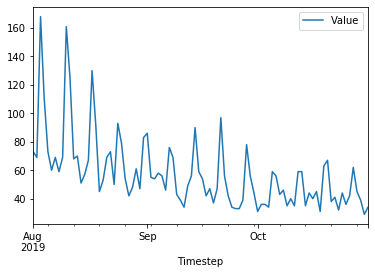

In [9]:
site_5298_meeting_data_1.plot()

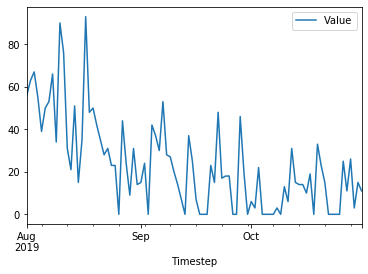

In [10]:
site_5299_meeting_data_1.plot()

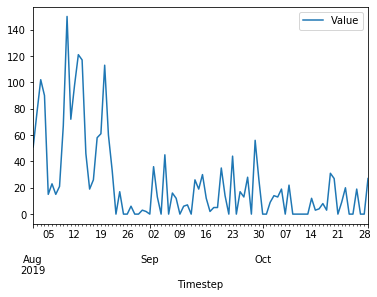

In [11]:
site_10648_meeting_data_1.plot()

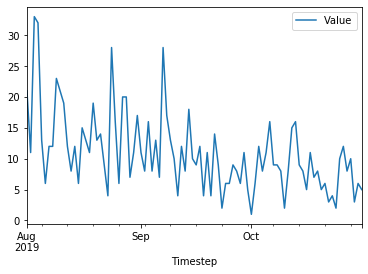

In [12]:
site_7976_meeting_data_1.plot()

In [10]:
initial_data_file = base_dir + r'/Urban World Predict Challenge Data/RunDataTable.tsv'
rr_0260_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0260-RunDataTable.tsv'
rr_0310_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0310-RunDataTable.tsv'
rr_0320_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0320-RunDataTable.tsv'
rr_0330_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0330-RunDataTable.tsv'
rr_0340_qualitative_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0340-QualitativeDataTable.tsv'
rr_0340_relationship_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0340-RelationshipDataTable.tsv'
rr_0340_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0340-RunDataTable.tsv'
rr_0370_qualitative_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0370-QualitativeDataTable.tsv'
rr_0370_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0370-RunDataTable.tsv'
rr_0380_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0380-RunDataTable.tsv'
rr_0390_data_file = base_dir + r'/Urban World Predict Challenge Data/RR-0390-RunDataTable.tsv'
idp_sup_data_file = base_dir + r'/Urban World Predict Challenge Data/IDP_SUP_RunDataTable.tsv'

In [11]:
initial_data = pd.read_csv(initial_data_file,delimiter='\t',encoding='utf-8', index_col=False)
initial_data['VariableName'].unique()


/home/workstation/software/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array(['CurrentVisitor', 'OngoingMeetingId', 'Participant', 'Enter',
       'Leave', 'Checkin', 'Checkout'], dtype=object)

In [12]:
site_2629_meeting_data_2 = get_meeting_data(initial_data, 'Site-2629')
site_5298_meeting_data_2 = get_meeting_data(initial_data, 'Site-5298')
site_5299_meeting_data_2 = get_meeting_data(initial_data, 'Site-5299')
site_10648_meeting_data_2 = get_meeting_data(initial_data, 'Site-10648')
site_7976_meeting_data_2 = get_meeting_data(initial_data, 'Site-7976')

site_2629_meeting_data =  pd.concat([site_2629_meeting_data_1, site_2629_meeting_data_2])
site_5298_meeting_data =  pd.concat([site_5298_meeting_data_1, site_5298_meeting_data_2])
site_5299_meeting_data =  pd.concat([site_5299_meeting_data_1, site_5299_meeting_data_2])
site_10648_meeting_data =  pd.concat([site_10648_meeting_data_1, site_10648_meeting_data_2])
site_7976_meeting_data =  pd.concat([site_7976_meeting_data_1, site_7976_meeting_data_2])

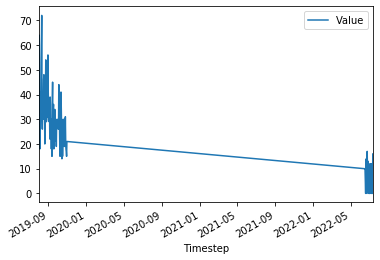

In [13]:
site_2629_meeting_data.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f104eea3090>,
      dtype=object)

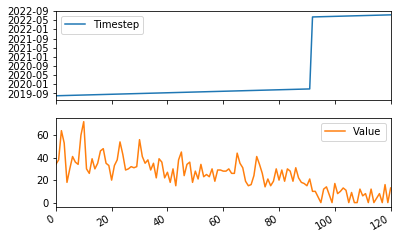

In [14]:

df=site_2629_meeting_data.reset_index()
df.plot(subplots=True)

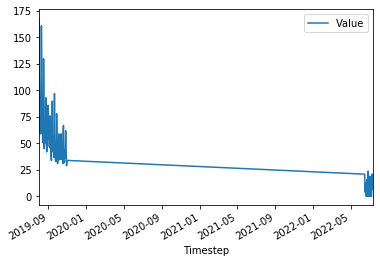

In [18]:

site_5298_meeting_data.plot()

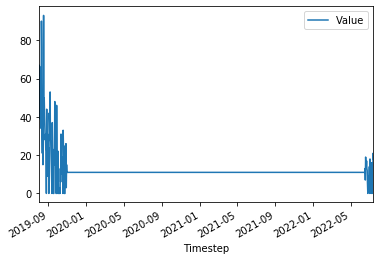

In [19]:

site_5299_meeting_data.plot()

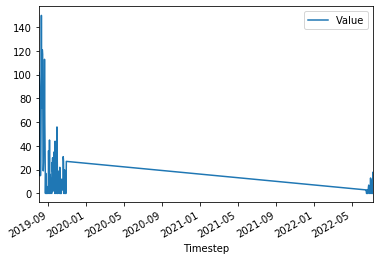

In [20]:

site_10648_meeting_data.plot()

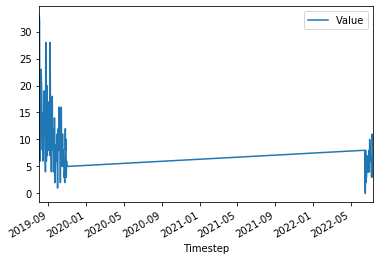

In [21]:

site_7976_meeting_data.plot()

In [28]:
def univariate_data(dataset, start_index, end_index, history_size, target_size,  single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
#     print(dataset.shape)        
    data.append(np.reshape(dataset[indices], (history_size, 1)))
#     print(dataset.shape)
#     labels.append(dataset[i+target_size])
    if single_step:
      labels.append(dataset[i+target_size])
    else:
      labels.append(dataset[i:i+target_size])
    
  return np.array(data), np.array(labels)

def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

def normalize(data, train_split):
    mean = data[:TRAIN_SPLIT].mean()
    std = data[:TRAIN_SPLIT].std()
    data = (data-mean)/std
    return data

def create_time_steps(length):
  time_steps = []
  for i in range(-length, 0, 1):
    time_steps.append(i)
  return time_steps

def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)
  STEP = 1

  plt.plot(num_in, np.array(history), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

def split_data(data, train_split, past_history, future_target, buffer_size, batch_size):
    x_train, y_train = univariate_data(data, 0, train_split,
                                           past_history,
                                           future_target)
    print('x_train shape=',x_train.shape)
    print('y_train shape=',y_train.shape)
    x_val, y_val = univariate_data(data, train_split, None,
                                       past_history,
                                       future_target)
    
    y_pred = x_val[:, -future_target:]
    print('base line error:',np.mean(tf.keras.losses.mean_squared_error(y_val, y_pred)))
    train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()

    val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
    val_data = val_data.batch(batch_size).repeat()
    
    return train_data, val_data

def windowed_data(dataframe, window_size, target_size, batch_size,shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices(dataframe)
    dataset = dataset.window(window_size+target_size, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+target_size))
    dataset = dataset.shuffle(1000)
    dataset = dataset.map(lambda window: (window[:-target_size],window[-target_size:]))
    dataset = dataset.batch(batch_size)
    return dataset
    
    

In [29]:
TRAIN_SPLIT = 100
BUFFER_SIZE = 10000
BATCH_SIZE = 100
window_size = 8
target_size = 5
past_history = 8
future_target = 2

In [30]:
# site_2629_meeting_values = normalize(site_2629_meeting_data.values, TRAIN_SPLIT)
site_2629_meeting_values = site_2629_meeting_data.values
site_2629_meeting_values.shape

(121, 1)

In [31]:
site_2629_train_dataset = windowed_data(site_2629_meeting_values[:TRAIN_SPLIT], window_size, target_size, BATCH_SIZE)
site_2629_validation_dataset = windowed_data(site_2629_meeting_values[TRAIN_SPLIT:], window_size, target_size, BATCH_SIZE)

for x, y in site_2629_validation_dataset.take(1):
    print('x=',x.shape, 'y=',y.shape)
    print('x=',x.numpy(), 'y=',y.numpy())

x= (12, 8, 1) y= (12, 2, 1)
x= [[[11]
  [ 0]
  [ 9]
  [ 0]
  [ 0]
  [12]
  [ 6]
  [ 8]]

 [[10]
  [13]
  [11]
  [ 0]
  [ 9]
  [ 0]
  [ 0]
  [12]]

 [[ 8]
  [10]
  [13]
  [11]
  [ 0]
  [ 9]
  [ 0]
  [ 0]]

 [[ 6]
  [ 8]
  [ 0]
  [12]
  [ 0]
  [ 4]
  [ 8]
  [ 0]]

 [[12]
  [ 6]
  [ 8]
  [ 0]
  [12]
  [ 0]
  [ 4]
  [ 8]]

 [[ 8]
  [ 0]
  [12]
  [ 0]
  [ 4]
  [ 8]
  [ 0]
  [16]]

 [[ 0]
  [ 0]
  [12]
  [ 6]
  [ 8]
  [ 0]
  [12]
  [ 0]]

 [[ 0]
  [ 9]
  [ 0]
  [ 0]
  [12]
  [ 6]
  [ 8]
  [ 0]]

 [[17]
  [ 8]
  [10]
  [13]
  [11]
  [ 0]
  [ 9]
  [ 0]]

 [[ 9]
  [ 0]
  [ 0]
  [12]
  [ 6]
  [ 8]
  [ 0]
  [12]]

 [[ 0]
  [12]
  [ 6]
  [ 8]
  [ 0]
  [12]
  [ 0]
  [ 4]]

 [[13]
  [11]
  [ 0]
  [ 9]
  [ 0]
  [ 0]
  [12]
  [ 6]]] y= [[[ 0]
  [12]]

 [[ 6]
  [ 8]]

 [[12]
  [ 6]]

 [[16]
  [ 0]]

 [[ 0]
  [16]]

 [[ 0]
  [13]]

 [[ 4]
  [ 8]]

 [[12]
  [ 0]]

 [[ 0]
  [12]]

 [[ 0]
  [ 4]]

 [[ 8]
  [ 0]]

 [[ 8]
  [ 0]]]


In [32]:

site_2629_train_data, site_2629_val_data = split_data(site_2629_meeting_values, TRAIN_SPLIT, past_history, 
                                 future_target, BUFFER_SIZE, BATCH_SIZE)


# for x, y in site_2629_train_data.take(1):
#     print('x=',x.shape, 'y=',y.shape)
#     print('x=',x.numpy(), 'y=',y.numpy())

x_train shape= (92, 8, 1)
y_train shape= (92, 2, 1)
base line error: 45.13636363636363


In [33]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=(window_size,1)))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(target_size))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mse')

In [34]:
EVALUATION_INTERVAL = 200
EPOCHS = 40

multi_step_history = multi_step_model.fit(site_2629_train_dataset, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=site_2629_validation_dataset, validation_steps=200)

Train for 200 steps, validate for 200 steps
Epoch 1/40
  1/200 [..............................] - ETA: 13:58 - loss: 907.2725WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 8000 batches). You may need to use the repeat() function when building your dataset.


In [35]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

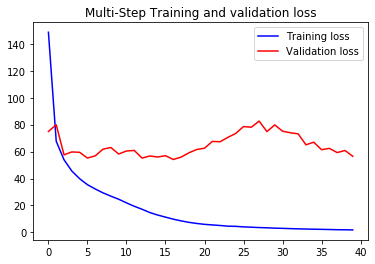

In [30]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

In [22]:
STEP = 1
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

In [32]:
for x, y in site_2629_val_data.take(3):
#     print('x=',x,'y=',y, 'predict=', multi_step_model.predict(x))
    multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

TypeError: Input 'b' of 'MatMul' Op has type float32 that does not match type int64 of argument 'a'.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(2)
])
model.compile(optimizer='adam', loss='mse')
EVALUATION_INTERVAL = 200
EPOCHS = 25

history = model.fit(site_2629_train_dataset, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=site_2629_validation_dataset, validation_steps=200)

plot_train_history(history, 'Multi-Step Training and validation loss')


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, 1)))
model.add(tf.keras.layers.Dense(2))

model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')
history = model.fit(site_2629_train_dataset,
                              steps_per_epoch=200,
                                  epochs=40,
                              validation_data=site_2629_validation_dataset,
                              validation_steps=200)
plot_train_history(history, 'Multi-Step Training and validation loss')


Epoch 1/500
1/1 [==============================] - 0s 137ms/step - loss: 28.4523 - val_loss: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 126ms/step - loss: 25.5896 - val_loss: 5.9369
Epoch 3/500
1/1 [==============================] - 0s 132ms/step - loss: 22.4626 - val_loss: 5.8972
Epoch 4/500
1/1 [==============================] - 0s 129ms/step - loss: 19.1774 - val_loss: 5.8502
Epoch 5/500
1/1 [==============================] - 0s 124ms/step - loss: 16.5470 - val_loss: 5.8173
Epoch 6/500
1/1 [==============================] - 0s 132ms/step - loss: 16.0846 - val_loss: 5.7801
Epoch 7/500
1/1 [==============================] - 0s 212ms/step - loss: 14.5793 - val_loss: 5.7740
Epoch 8/500
1/1 [==============================] - 0s 197ms/step - loss: 15.7425 - val_loss: 5.7472
Epoch 9/500
1/1 [==============================] - 0s 128ms/step - loss: 12.8431 - val_loss: 5.7558
Epoch 10/500
1/1 [==============================] - 0s 144ms/step - loss: 13.8784 - val_loss: 5.

Epoch 83/500
1/1 [==============================] - 0s 124ms/step - loss: 8.8579 - val_loss: 5.5580
Epoch 84/500
1/1 [==============================] - 0s 123ms/step - loss: 10.2849 - val_loss: 5.5599
Epoch 85/500
1/1 [==============================] - 0s 123ms/step - loss: 10.3756 - val_loss: 5.5444
Epoch 86/500
1/1 [==============================] - 0s 126ms/step - loss: 9.8009 - val_loss: 5.5223
Epoch 87/500
1/1 [==============================] - 0s 125ms/step - loss: 10.1426 - val_loss: 5.5481
Epoch 88/500
1/1 [==============================] - 0s 126ms/step - loss: 10.0714 - val_loss: 5.5029
Epoch 89/500
1/1 [==============================] - 0s 122ms/step - loss: 10.1803 - val_loss: 5.5070
Epoch 90/500
1/1 [==============================] - 0s 124ms/step - loss: 9.3718 - val_loss: 5.5075
Epoch 91/500
1/1 [==============================] - 0s 123ms/step - loss: 9.2447 - val_loss: 5.5042
Epoch 92/500
1/1 [==============================] - 0s 125ms/step - loss: 10.0411 - val_loss: 5

Epoch 165/500
1/1 [==============================] - 0s 129ms/step - loss: 8.8710 - val_loss: 5.4337
Epoch 166/500
1/1 [==============================] - 0s 126ms/step - loss: 8.3846 - val_loss: 5.4227
Epoch 167/500
1/1 [==============================] - 0s 123ms/step - loss: 8.9942 - val_loss: 5.4525
Epoch 168/500
1/1 [==============================] - 0s 122ms/step - loss: 8.3750 - val_loss: 5.4625
Epoch 169/500
1/1 [==============================] - 0s 148ms/step - loss: 8.8468 - val_loss: 5.4434
Epoch 170/500
1/1 [==============================] - 0s 138ms/step - loss: 8.4729 - val_loss: 5.4494
Epoch 171/500
1/1 [==============================] - 0s 123ms/step - loss: 7.8887 - val_loss: 5.4435
Epoch 172/500
1/1 [==============================] - 0s 125ms/step - loss: 9.1842 - val_loss: 5.4354
Epoch 173/500
1/1 [==============================] - 0s 121ms/step - loss: 8.7498 - val_loss: 5.4823
Epoch 174/500
1/1 [==============================] - 0s 142ms/step - loss: 8.3514 - val_los

1/1 [==============================] - 0s 122ms/step - loss: 8.7476 - val_loss: 5.5265
Epoch 247/500
1/1 [==============================] - 0s 123ms/step - loss: 8.0868 - val_loss: 5.5156
Epoch 248/500
1/1 [==============================] - 0s 124ms/step - loss: 8.2786 - val_loss: 5.5171
Epoch 249/500
1/1 [==============================] - 0s 121ms/step - loss: 8.6752 - val_loss: 5.5375
Epoch 250/500
1/1 [==============================] - 0s 123ms/step - loss: 8.8377 - val_loss: 5.5339
Epoch 251/500
1/1 [==============================] - 0s 125ms/step - loss: 8.1393 - val_loss: 5.5475
Epoch 252/500
1/1 [==============================] - 0s 127ms/step - loss: 7.8758 - val_loss: 5.5304
Epoch 253/500
1/1 [==============================] - 0s 126ms/step - loss: 8.3876 - val_loss: 5.5426
Epoch 254/500
1/1 [==============================] - 0s 124ms/step - loss: 7.6272 - val_loss: 5.5303
Epoch 255/500
1/1 [==============================] - 0s 122ms/step - loss: 7.9575 - val_loss: 5.5590
Epoc

Epoch 328/500
1/1 [==============================] - 0s 126ms/step - loss: 7.7221 - val_loss: 5.5785
Epoch 329/500
1/1 [==============================] - 0s 123ms/step - loss: 7.4639 - val_loss: 5.5526
Epoch 330/500
1/1 [==============================] - 0s 124ms/step - loss: 7.4999 - val_loss: 5.5853
Epoch 331/500
1/1 [==============================] - 0s 120ms/step - loss: 7.9566 - val_loss: 5.5708
Epoch 332/500
1/1 [==============================] - 0s 124ms/step - loss: 7.7584 - val_loss: 5.5879
Epoch 333/500
1/1 [==============================] - 0s 126ms/step - loss: 8.3031 - val_loss: 5.5957
Epoch 334/500
1/1 [==============================] - 0s 127ms/step - loss: 8.0987 - val_loss: 5.5718
Epoch 335/500
1/1 [==============================] - 0s 124ms/step - loss: 8.2211 - val_loss: 5.6135
Epoch 336/500
1/1 [==============================] - 0s 125ms/step - loss: 8.2258 - val_loss: 5.5894
Epoch 337/500
1/1 [==============================] - 0s 127ms/step - loss: 8.0320 - val_los

1/1 [==============================] - 0s 125ms/step - loss: 7.4503 - val_loss: 5.5371
Epoch 410/500
1/1 [==============================] - 0s 128ms/step - loss: 7.6491 - val_loss: 5.5589
Epoch 411/500
1/1 [==============================] - 0s 125ms/step - loss: 7.8940 - val_loss: 5.5289
Epoch 412/500
1/1 [==============================] - 0s 124ms/step - loss: 7.8660 - val_loss: 5.5659
Epoch 413/500
1/1 [==============================] - 0s 123ms/step - loss: 7.2065 - val_loss: 5.5385
Epoch 414/500
1/1 [==============================] - 0s 126ms/step - loss: 7.2653 - val_loss: 5.5731
Epoch 415/500
1/1 [==============================] - 0s 126ms/step - loss: 7.7394 - val_loss: 5.5312
Epoch 416/500
1/1 [==============================] - 0s 128ms/step - loss: 7.0871 - val_loss: 5.5714
Epoch 417/500
1/1 [==============================] - 0s 123ms/step - loss: 7.2082 - val_loss: 5.5698
Epoch 418/500
1/1 [==============================] - 0s 125ms/step - loss: 7.7192 - val_loss: 5.5456
Epoc

Epoch 491/500
1/1 [==============================] - 0s 128ms/step - loss: 7.5739 - val_loss: 5.5258
Epoch 492/500
1/1 [==============================] - 0s 127ms/step - loss: 7.5858 - val_loss: 5.5104
Epoch 493/500
1/1 [==============================] - 0s 127ms/step - loss: 7.0460 - val_loss: 5.5066
Epoch 494/500
1/1 [==============================] - 0s 131ms/step - loss: 7.4934 - val_loss: 5.4944
Epoch 495/500
1/1 [==============================] - 0s 153ms/step - loss: 7.0587 - val_loss: 5.5067
Epoch 496/500
1/1 [==============================] - 0s 130ms/step - loss: 7.0424 - val_loss: 5.5038
Epoch 497/500
1/1 [==============================] - 0s 125ms/step - loss: 7.3574 - val_loss: 5.5398
Epoch 498/500
1/1 [==============================] - 0s 126ms/step - loss: 7.7824 - val_loss: 5.5241
Epoch 499/500
1/1 [==============================] - 0s 127ms/step - loss: 7.3738 - val_loss: 5.5447
Epoch 500/500
1/1 [==============================] - 0s 123ms/step - loss: 7.5740 - val_los

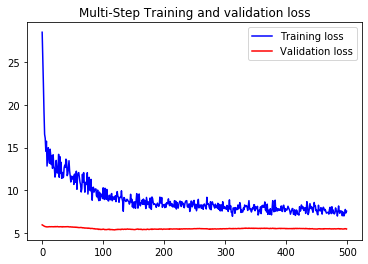

In [42]:
model_2629 = tf.keras.models.Sequential()
model_2629.add(tf.keras.layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, 1)))
model_2629.add(tf.keras.layers.GRU(64, activation='relu',
                     dropout=0.2,
                     recurrent_dropout=0.5))
model_2629.add(tf.keras.layers.Dense(target_size))

model_2629.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')
history_2629 = model_2629.fit_generator(site_2629_train_dataset,
#                               steps_per_epoch=200,
                              epochs=500,
                              validation_data=site_2629_validation_dataset,
#                               validation_steps=200
                             )
plot_train_history(history_2629, 'Multi-Step Training and validation loss')



In [26]:
model_2629.predict(site_2629_meeting_values[np.newaxis, 0:8].astype(np.float32))

array([[-0.3769845 ,  0.45602578]], dtype=float32)

###### type(site_2629_meeting_values)

In [ ]:
forecast = []
for time in range(0, len(site_2629_meeting_values) - window_size,target_size):
    print('time:', time)
    pred = model.predict(site_2629_meeting_values[time:time + window_size][np.newaxis].astype(np.float32))
    print(pred)
    pred = pred.reshape(target_size)
    print(pred)
    forecast.append(pred)

print(forecast.shape)
# forecast = forecast[TRAIN_SPLIT-window_size:]
results = np.array(forecast)[:, 0, 0]

results.shape